<a href="https://colab.research.google.com/github/git-chinmay/myML/blob/master/MNIST_DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [0]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#Normalization(Try without Normalization also)
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

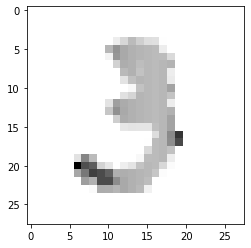

In [5]:
plt.imshow(x_train[10],cmap=plt.cm.binary)
plt.show()

In [0]:
#Build the model
model = tf.keras.models.Sequential()
#Input Layer
model.add(tf.keras.layers.Flatten())
#Hidden Layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
#Output Layer
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [7]:
#Parameters for training of the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3202 - accuracy: 0.9120
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1446 - accuracy: 0.9569
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0977 - accuracy: 0.9709


In [0]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 1s 67us/sample - loss: 0.1122 - accuracy: 0.9665
0.11222249470092356 0.9665


In [11]:
predictions = model.predict(x_test)
print(predictions)

[[9.42539629e-08 2.90737945e-09 5.69667145e-06 ... 9.99317169e-01
  5.45778221e-07 3.16937508e-06]
 [5.06876177e-07 2.83918320e-03 9.95599747e-01 ... 7.89908763e-12
  3.12605880e-06 5.44441124e-11]
 [5.63170147e-07 9.99429524e-01 1.20628494e-04 ... 1.00026380e-04
  8.00365888e-05 3.03959638e-07]
 ...
 [8.35105940e-09 1.37005699e-07 9.33508630e-08 ... 5.94722842e-05
  5.75344857e-05 1.13214413e-03]
 [2.03962954e-05 7.57471480e-06 7.80226742e-07 ... 9.96943527e-07
  4.11363598e-03 1.75002995e-07]
 [2.08066967e-06 1.86471780e-08 2.27797645e-05 ... 2.10981144e-09
  4.48854962e-08 2.81025052e-08]]


In [0]:
#We can save the model
model.save('Basic_MNIST_NUM_Reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Basic_MNIST_NUM_Reader.model\assets


In [0]:
#Loading the model
new_model = tf.keras.models.load_model('Basic_MNIST_NUM_Reader.model')

In [0]:
#Predictions
predictions = new_model.predict(x_test)
print(predictions)

[[5.1590494e-08 2.5520619e-10 6.0336001e-06 ... 9.9975771e-01
  6.5238396e-08 2.7120518e-07]
 [1.6176847e-06 3.5385793e-04 9.9929082e-01 ... 6.1867048e-12
  8.3533706e-08 2.6227718e-11]
 [8.9944712e-07 9.9940443e-01 2.3192546e-04 ... 5.5422526e-05
  1.1806233e-04 4.0190312e-06]
 ...
 [1.8583107e-08 4.5446026e-07 2.7264844e-07 ... 3.2091422e-05
  3.2802764e-05 2.1450527e-03]
 [3.3761302e-05 4.1537444e-07 8.2346406e-07 ... 8.2524389e-07
  9.9989360e-05 2.0928928e-07]
 [1.5722409e-05 6.3689811e-08 1.1829563e-04 ... 2.1580771e-08
  1.5639477e-08 7.0966166e-09]]


In [12]:
np.argmax(predictions[900])

1

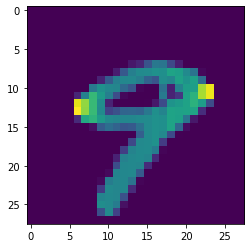

In [16]:
#Reconfirming with Image
plt.imshow(x_test[9])
plt.show()